In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pathresults = "../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","
import matplotlib.ticker as mtick

In [76]:

# get param set
paramsets =  pd.read_csv('../../output_random_rows.csv')
paramsets = paramsets.drop(paramsets.columns.tolist()[-1],axis=1)
paramsets.drop('theta',inplace=True, axis=1)
paramsets.drop('ro_B',inplace=True, axis=1)
paramsets.drop('k_sorp',inplace=True, axis=1)
paramsets.drop('CSS_max',inplace=True, axis=1)
#paramsets.drop('K_L',inplace=True, axis=1)
selectedSets =[17,38,44,85]# [36,44,51,68][36,44,51, 68]# [19, 47, 76, 83]
paramsets['Pset']= [i for i in range(99)]
#paramsets = paramsets.loc[[19, 47, 76, 83]]#paramsets.loc(selectedSets)

In [77]:
repr(paramsets.columns.tolist())

"['beta_C', 'beta_O', 'C_thres,C', 'C_thres,O', 'DS_W', 'k_C,S', 'k_d,C', 'k_d,O', 'K_L', 'k_O,S', 'k_r,C', 'k_r,O', 'm_max,C', 'm_max,O', 'p_L', 'u_max,C', 'u_max,O', 'v_max,L', 'Y', 'Y_C', 'Y_O', 'CL_init', 'CS_init', 'Pset']"

In [78]:
# from parameter constraints
paramsets_ = pd.DataFrame()
paramsets_['λ_fitnessC'] = paramsets['u_max,C']/paramsets['m_max,C'] 
paramsets_['λ_fitnessO'] = paramsets['u_max,O'] /paramsets['m_max,O']

paramsets_['λ_deactC'] = paramsets['k_d,C']/paramsets['u_max,C'] 
paramsets_['λ_deactO'] = paramsets['k_d,O']/paramsets['u_max,O'] 
paramsets_['λ_reactC'] = paramsets['k_r,C']/paramsets['u_max,C'] 
paramsets_['λ_reactO'] = paramsets['k_r,O']/paramsets['u_max,O'] 
paramsets_['λ_ThresC'] = paramsets['C_thres,C']*paramsets['k_C,S']/paramsets['u_max,O'] 
paramsets_['λ_ThresO'] = paramsets['C_thres,O']*paramsets['k_O,S']/paramsets['u_max,O'] 

 
paramsets_['Sdecay_C,D0'] = (1/ paramsets_['λ_fitnessC'])/paramsets['Y'] *(
(1/ paramsets_['λ_fitnessC'])/((1/ paramsets_['λ_fitnessC'])+1))
paramsets_['Sdecay_O,D0'] =(1/ paramsets_['λ_fitnessO'])/paramsets['Y'] *(
(1/ paramsets_['λ_fitnessO'])/((1/ paramsets_['λ_fitnessO'])+1))

paramsets_['Sdeact_C,D0'] = paramsets_['λ_deactC']*(
    1-1/((np.exp((paramsets_['λ_ThresC']-1)/(paramsets_['λ_ThresC']*0.1))+1)))
paramsets_['Sdeact_O,D0'] = paramsets_['λ_deactO']*(
    1-1/((np.exp((paramsets_['λ_ThresO']-1)/(paramsets_['λ_ThresO']*0.1))+1)))

paramsets_['Sreact_C,D0'] = paramsets_['λ_reactC']*(
    1/((np.exp((paramsets_['λ_ThresC']-1)/(paramsets_['λ_ThresC']*0.1))+1)))
paramsets_['Sreact_O,D0'] = paramsets_['λ_reactO']*(
    1/((np.exp((paramsets_['λ_ThresO']-1)/(paramsets_['λ_ThresO']*0.1))+1)))

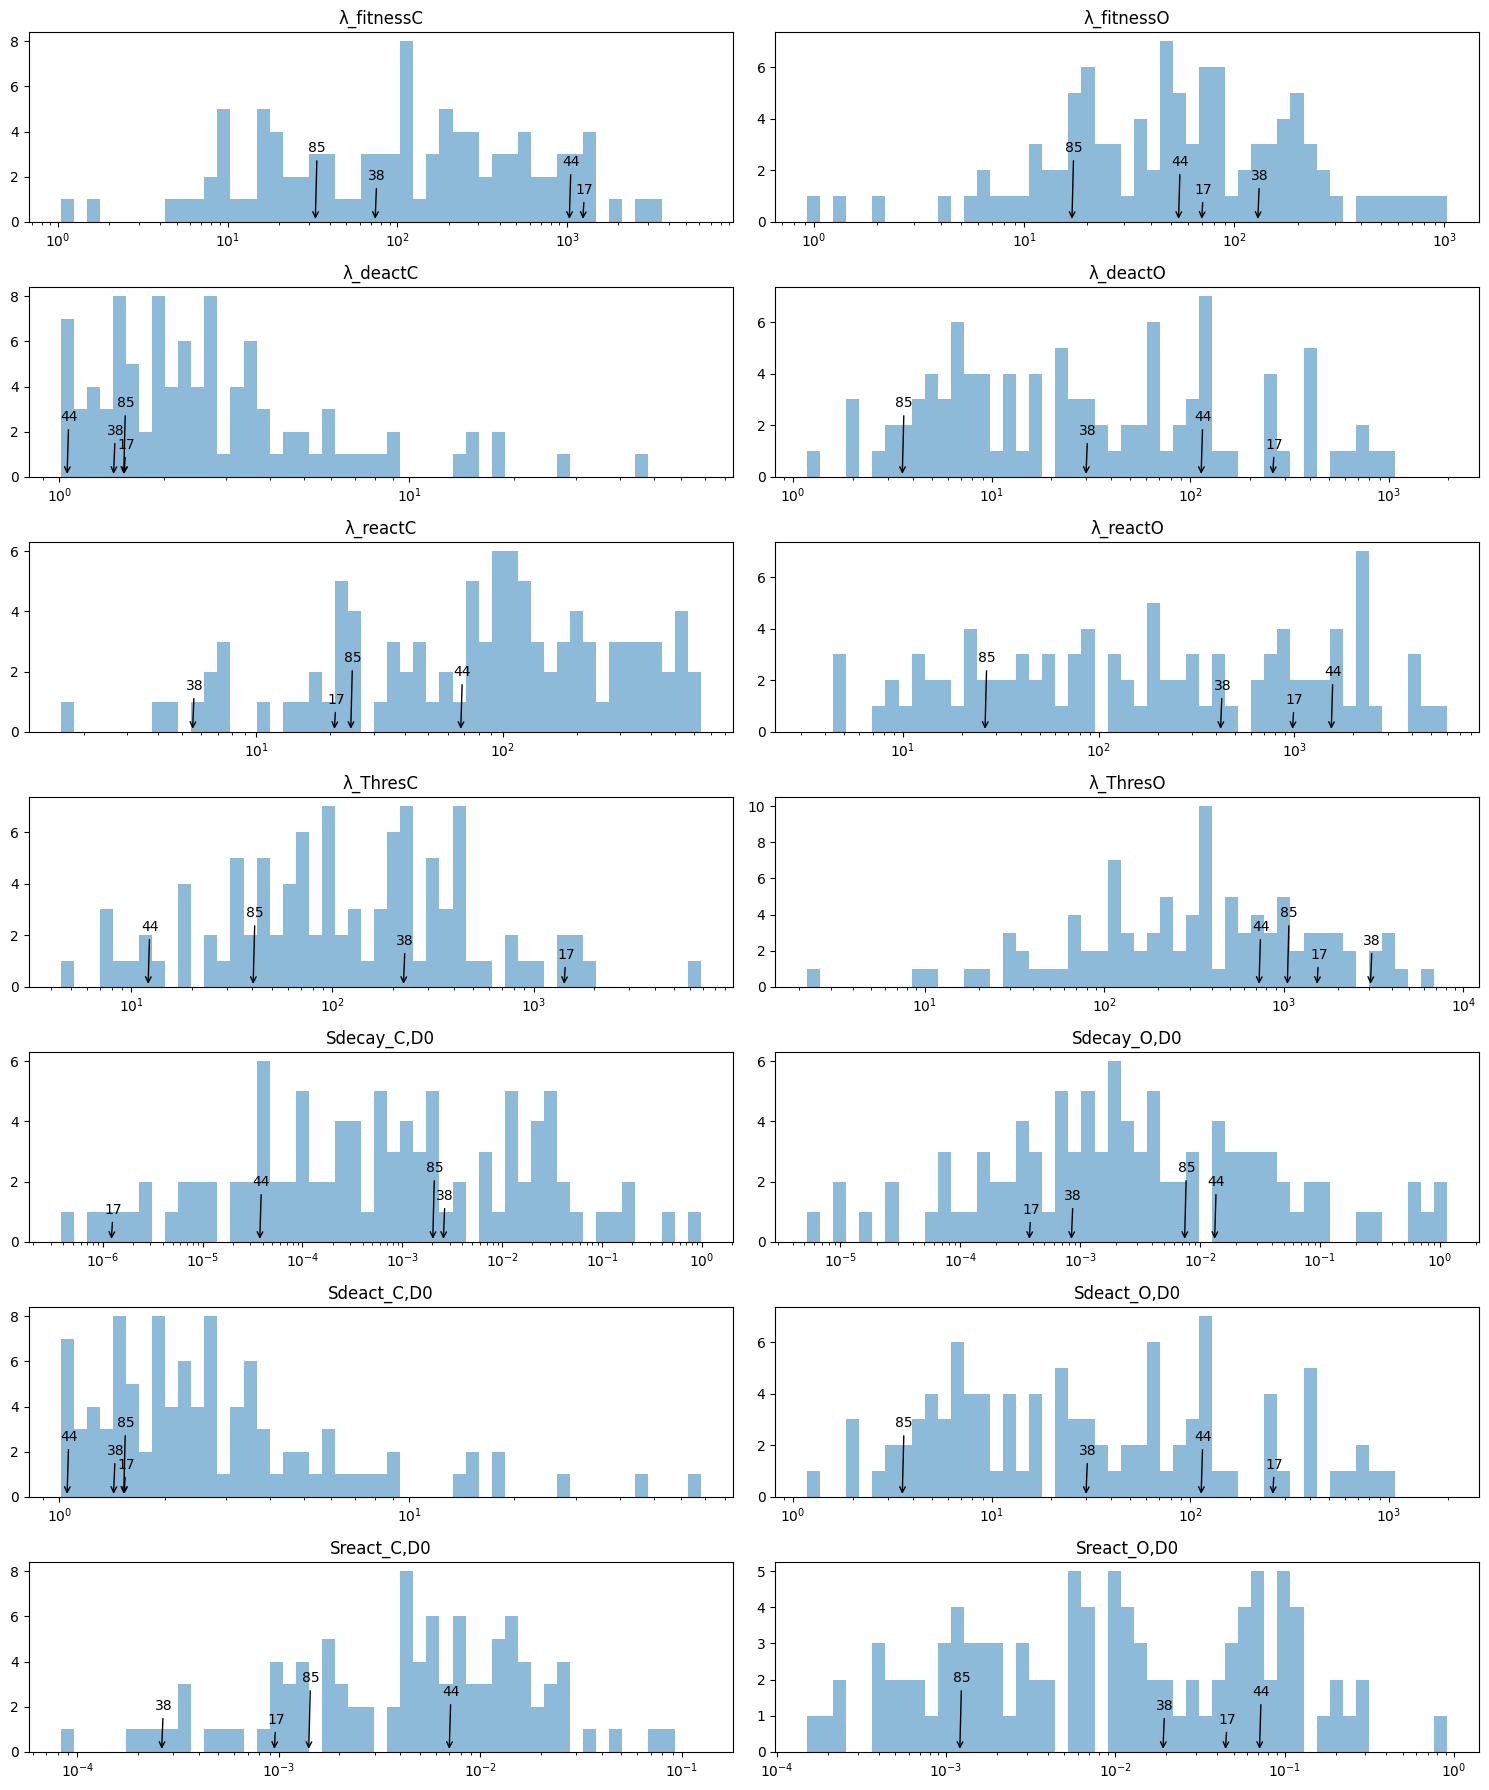

In [79]:
# Create subplots grid

# Calculate the number of rows and columns needed for subplots
num_rows = 7
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Flatten the axes array to iterate over them easily
axes = axes.flatten()

#outliers = selectedSets
# Plot histograms for each column
for i, column in enumerate(paramsets_.columns):
    ax = axes[i]  # Get the current axis
    ax.hist(paramsets_[column], alpha=0.5, 
            bins=np.logspace(np.log10(min( paramsets_[column])),
                             np.log10(max( paramsets_[column])), 50))
    ax.set_title(column)
    
    xtexts = [-10, 20, 50, 80]*2
    ytexts = [20, 30, 40, 50]*2
    # Add label for maximum value
    for idout, outliers in enumerate(selectedSets):
        # Find row index with maximum value for the current column
        max_row_index = outliers
        max_value = paramsets_[column][outliers]
        ax.annotate(max_row_index,
                     xy=(max_value, 0), xycoords='data',
                     xytext=(-5, ytexts[idout]), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    ax.set_xscale('log')

# Remove any empty subplots if the number of columns exceeds the number of data columns
for i in range(len(paramsets_.columns), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [46]:
paramsets_.iloc[selectedSets]

,λ_fitnessC,λ_fitnessO,λ_deactC,λ_deactO,λ_reactC,λ_reactO,λ_ThresC,λ_ThresO,"Sdecay_C,D0","Sdecay_O,D0","Sdeact_C,D0","Sdeact_O,D0","Sreact_C,D0","Sreact_O,D0"
17,1233.763533,69.827857,1.531868,260.245471,20.743330,977.202544,1417.250677,1529.051018,0.000001,0.000375,1.531798,260.233579,0.000948,0.044654
27,40.277353,16.238311,1.138862,4.418728,22.566006,7.497448,35.147427,114.780654,0.006840,0.040624,1.138793,4.418509,0.001362,0.000371
40,1866.879229,86.982309,2.000343,113.657405,14.166927,4512.849748,314.456337,1904.426307,0.000011,0.005152,2.000249,113.652218,0.000664,0.205952
73,5.700503,91.877433,2.167128,15.567729,24.894121,54.664701,88.665618,6098.030136,0.047175,0.000211,2.167018,15.567021,0.001265,0.002486


In [47]:
repr(paramsets.columns.tolist())

"['beta_C', 'beta_O', 'C_thres,C', 'C_thres,O', 'DS_W', 'k_C,S', 'k_d,C', 'k_d,O', 'K_L', 'k_O,S', 'k_r,C', 'k_r,O', 'm_max,C', 'm_max,O', 'p_L', 'u_max,C', 'u_max,O', 'v_max,L', 'Y', 'Y_C', 'Y_O', 'CL_init', 'CS_init', 'Pset']"

In [48]:
paramsets_ = pd.DataFrame()
# mol/cm3 * [g/mol] * [mg/g]
C_aInitO = 9.16666666666667e-07 * 12 * 1000
C_dInitO = 8.33333333333333e-06 * 12 * 1000
C_aInitC = 8.33333333333333e-07 * 12 * 1000
C_dInitC = 8.33333333333333e-06 * 12 * 1000

kads = 7.07e+02 # m3/kgC/yr, see 10.1016/j.soilbio.2020.107912, A.3
yr_per_d = 1/365 # [yr/d]
m3_per_cm3 = 1e-6; # m3/cm3
cm3_per_m3 = 1e6; # cm3/m3
mg_per_kgC = 1e6 # mg/kg
# [m3/kgC/yr] * [yr/d] * [cm3/m3] * [kgC/mg] = [cm3/mg/d]
kads = kads * yr_per_d * cm3_per_m3 * mg_per_kgC
kdes =  1.63e+03 # [1/yr] see 10.1016/j.soilbio.2020.107912, A.3
kdes = kdes * yr_per_d # [1/d]

# C_thresC, C_thresO, CS_init have strong correlation
# mgC/cm3 water

# O
paramsets_['phiO'] = 1/(1 + np.exp((paramsets['C_thres,O'] - paramsets['CS_init'])/(0.1 * paramsets['C_thres,O'])))

paramsets_['F_deactO']  = (1 - paramsets_['phiO'] ) * paramsets['k_d,O']  * C_aInitO
paramsets_['F_reactO']  = paramsets_['phiO']  *  paramsets['k_r,O']  * C_dInitO
paramsets_['F_uptake_S_AO'] = (paramsets['m_max,O'] * paramsets['CS_init'] * paramsets['k_O,S'])/(paramsets['m_max,O'] + paramsets['CS_init'] * paramsets['k_O,S']) * C_aInitO
paramsets_['F_uptake_S_DO'] = (paramsets['m_max,O'] * paramsets['CS_init'] * paramsets['k_O,S']
                              )/(paramsets['m_max,O'] + paramsets['CS_init'] * paramsets['k_O,S']) * paramsets['beta_O'] * C_dInitO

paramsets_['F_decay_AO'] = paramsets['m_max,O'] * C_aInitO  - paramsets_['F_uptake_S_AO'] 
paramsets_['F_decay_DO'] = paramsets['m_max,O'] * paramsets['beta_O']  * C_dInitO - paramsets_['F_uptake_S_DO'] 

paramsets_['F_growthO'] = (paramsets['u_max,O'] * paramsets['CS_init'] * paramsets['k_O,S'])/(paramsets['u_max,O'] + paramsets['CS_init'] * paramsets['k_O,S']) * C_aInitO

# sum
paramsets_['F_uptake_S'] = paramsets_['F_uptake_S_AO'] + paramsets_['F_uptake_S_DO']
paramsets_['F_decay'] = paramsets_['F_decay_AO'] + paramsets_['F_decay_DO']
paramsets_['F_growth'] = paramsets_['F_growthO'] #(1/paramsets['Y_O']) * 

# C
paramsets_['phiC'] = 1/(1 + np.exp((paramsets['C_thres,C'] - paramsets['CS_init'])/(0.1 *paramsets['C_thres,C'])))

paramsets_['F_deactC']  = (1 - paramsets_['phiC'] ) * paramsets['k_d,C']  * C_aInitC
paramsets_['F_reactC']  = paramsets_['phiC']  *  paramsets['k_r,C']  * C_dInitC

paramsets_['F_uptake_S_AC'] = (paramsets['m_max,C'] * paramsets['CS_init'] * paramsets['k_C,S'])/(paramsets['m_max,C'] + paramsets['CS_init'] * paramsets['k_C,S']) * C_aInitO
paramsets_['F_uptake_S_DC'] = (paramsets['m_max,C'] * paramsets['CS_init'] * paramsets['k_C,S']
                              )/(paramsets['m_max,C'] + paramsets['CS_init'] * paramsets['k_C,S']) * paramsets['beta_C'] * C_dInitO 

paramsets_['F_decay_AC'] = paramsets['m_max,C'] * C_aInitO  - paramsets_['F_uptake_S_AC']
paramsets_['F_decay_DC'] = paramsets['m_max,C'] * paramsets['beta_C']  * C_dInitO  - paramsets_['F_uptake_S_DC'] 

paramsets_['F_growthC'] = (paramsets['u_max,C'] * paramsets['CS_init'] * paramsets['k_C,S'])/(paramsets['u_max,C'] + paramsets['CS_init'] * paramsets['k_C,S']) * C_aInitO 

# sum
paramsets_['F_uptake_S'] += paramsets_['F_uptake_S_AC'] + paramsets_['F_uptake_S_DC']
paramsets_['F_decay'] += paramsets_['F_decay_AC'] + paramsets_['F_decay_DC']
paramsets_['F_growth'] += paramsets_['F_growthC'] #(1/paramsets['Y_C']) * 

# microb
# add CSinit/CSSMax

paramsets_['dCoAdt'] = (paramsets_['F_growthO'] - paramsets_['F_deactO']  + paramsets_['F_reactO'] - (1/paramsets['Y'])*paramsets_['F_decay_AO'])
paramsets_['dCoDdt'] = (paramsets_['F_deactO']  - paramsets_['F_reactO'] - (1/paramsets['Y'])*paramsets_['F_decay_DO'])
paramsets_['dCcAdt'] = (paramsets_['F_growthC'] - paramsets_['F_deactC']  + paramsets_['F_reactC'] - (1/paramsets['Y'])*paramsets_['F_decay_AC'] ) 
paramsets_['dCcDdt'] = (paramsets_['F_deactC'] - paramsets_['F_reactC'] - (1/paramsets['Y'])*paramsets_['F_decay_DC'] ) 
paramsets_['dCO2dt'] = (((1-paramsets['Y_O'])/paramsets['Y_O']
                        )*paramsets_['F_growthO'] +((1-paramsets['Y_C'])/paramsets['Y_C']
                                                   )*paramsets_['F_growthC'] +((1-paramsets['Y'])/paramsets['Y']
                                                                              )*paramsets_['F_decay']+ paramsets_['F_uptake_S'])

#paramsets_['CSW/CSS'] =( paramsets['CS_init']+ (kdes/kads))/paramsets['CSS_max']

In [49]:
df = pd.DataFrame()
df['phiO'] = paramsets_['phiO']
df['phiC'] = paramsets_['phiC']
df['phiC/phiO'] = df['phiC']/df['phiO']
df['F_growth_O/F_decay_O'] = paramsets_['F_growthO']/((1/paramsets['Y'])*paramsets_['F_decay_DO'] + (1/paramsets['Y'])*paramsets_['F_decay_AO'])
df['F_growth_C/F_decay_C'] =  paramsets_['F_growthC']/((1/paramsets['Y'])*paramsets_['F_decay_DC'] + (1/paramsets['Y'])*paramsets_['F_decay_AC'])
df['(F_growth_O/F_decay_O)/(F_growth_C/F_decay_C)'] =(paramsets_['F_growthC']/((1/paramsets['Y'])*paramsets_['F_decay_DC'] + (1/paramsets['Y'])*paramsets_['F_decay_AC']))/(paramsets_['F_growthO']/((1/paramsets['Y'])*paramsets_['F_decay_DO'] + (1/paramsets['Y'])*paramsets_['F_decay_AO']))
df['F_deactC/F_reactC'] = paramsets_['F_deactC'] / paramsets_['F_reactC'] 
df['F_deactO/F_reactO'] = paramsets_['F_deactO'] / paramsets_['F_reactO'] 
df['(F_deactO/F_reactO)/(F_deactC/F_reactC)'] =( paramsets_['F_deactO'] / paramsets_['F_reactO'])/(paramsets_['F_deactC'] / paramsets_['F_reactC'] ) 
#df['d(Cs->MB)dt/d(MB->Cs)dt'] = (paramsets_['F_uptake_S'] + paramsets_['F_growth_S'])/ ((1 - paramsets['p_L'])*paramsets_['F_decay'])  # 'F_decay/(F_uptake_S+ F_growth_S)']
#df['d(MB_C->C)dt/d(C->MB_C)dt'] = ( (1/paramsets['Y'])*paramsets_['F_decay_AO']+(1/paramsets['Y'])*paramsets_['F_decay_DO'])/(paramsets_['F_uptake_S'] + paramsets_['F_growthO']) 
#df['d(MB_O->C)dt/d(C->MB_O)dt'] = ( (1/paramsets['Y'])*paramsets_['F_decay_AC']+(1/paramsets['Y'])*paramsets_['F_decay_DC'])/(paramsets_['F_uptake_S'] + paramsets_['F_growthC']) 
#df['d(MB->C)dt/d(Cs->MB)dt'] = ( (1/paramsets['Y'])* paramsets_['F_decay'])/(paramsets_['F_growth'])  # 'F_decay/(F_uptake_S+ F_growth_S)']

#df['(F_uptakeC + F_growthC)/(F_uptakeO + F_growthO)'] = (paramsets_['F_uptake_S_AC']+ paramsets_['F_uptake_S_DC'] +  paramsets_['F_growthC'])/ ( paramsets_['F_uptake_S_AO'] + paramsets_['F_uptake_S_DO'] +  paramsets_['F_growthO'])

df['dCoAdt/dCoDdt'] = paramsets_['dCoAdt']/paramsets_['dCoDdt']
df['dCcAdt/dCcDdt'] = paramsets_['dCcAdt']/paramsets_['dCcDdt'] 
df['(dCoAdt + dCcAdt)/(dCoDdt + dCcDdt)'] = (paramsets_['dCoAdt'] + paramsets_['dCcAdt'])/ (paramsets_['dCoDdt'] + paramsets_['dCcDdt'] ) 
df['(F_growth_O + F_decay_O)/(F_deactO+F_reactO)'] = (paramsets_['F_growthO'] + (1/paramsets['Y'])*paramsets_['F_decay_AO'] + (1/paramsets['Y'])*paramsets_['F_decay_DO']
                                                     )/( paramsets_['F_deactO'] + paramsets_['F_reactO'] )
df['(F_growth_C + F_decay_C)/(F_deactC+F_reactC)'] = (paramsets_['F_growthC'] + (1/paramsets['Y'])*paramsets_['F_decay_AC'] + (1/paramsets['Y'])*paramsets_['F_decay_DC']
                                                     )/( paramsets_['F_deactC'] + paramsets_['F_reactC'] )
df['dCO2dt/abs(dMBdt)'] = paramsets_['dCO2dt']/(abs(paramsets_['dCoAdt'])+abs(paramsets_['dCoDdt'])+abs(paramsets_['dCcAdt'])+abs(paramsets_['dCcDdt']))
#df['CSW/CSS'] = paramsets_['CSW/CSS']
# deact + react / growth + decay <= what causes turnover
# growth / decay

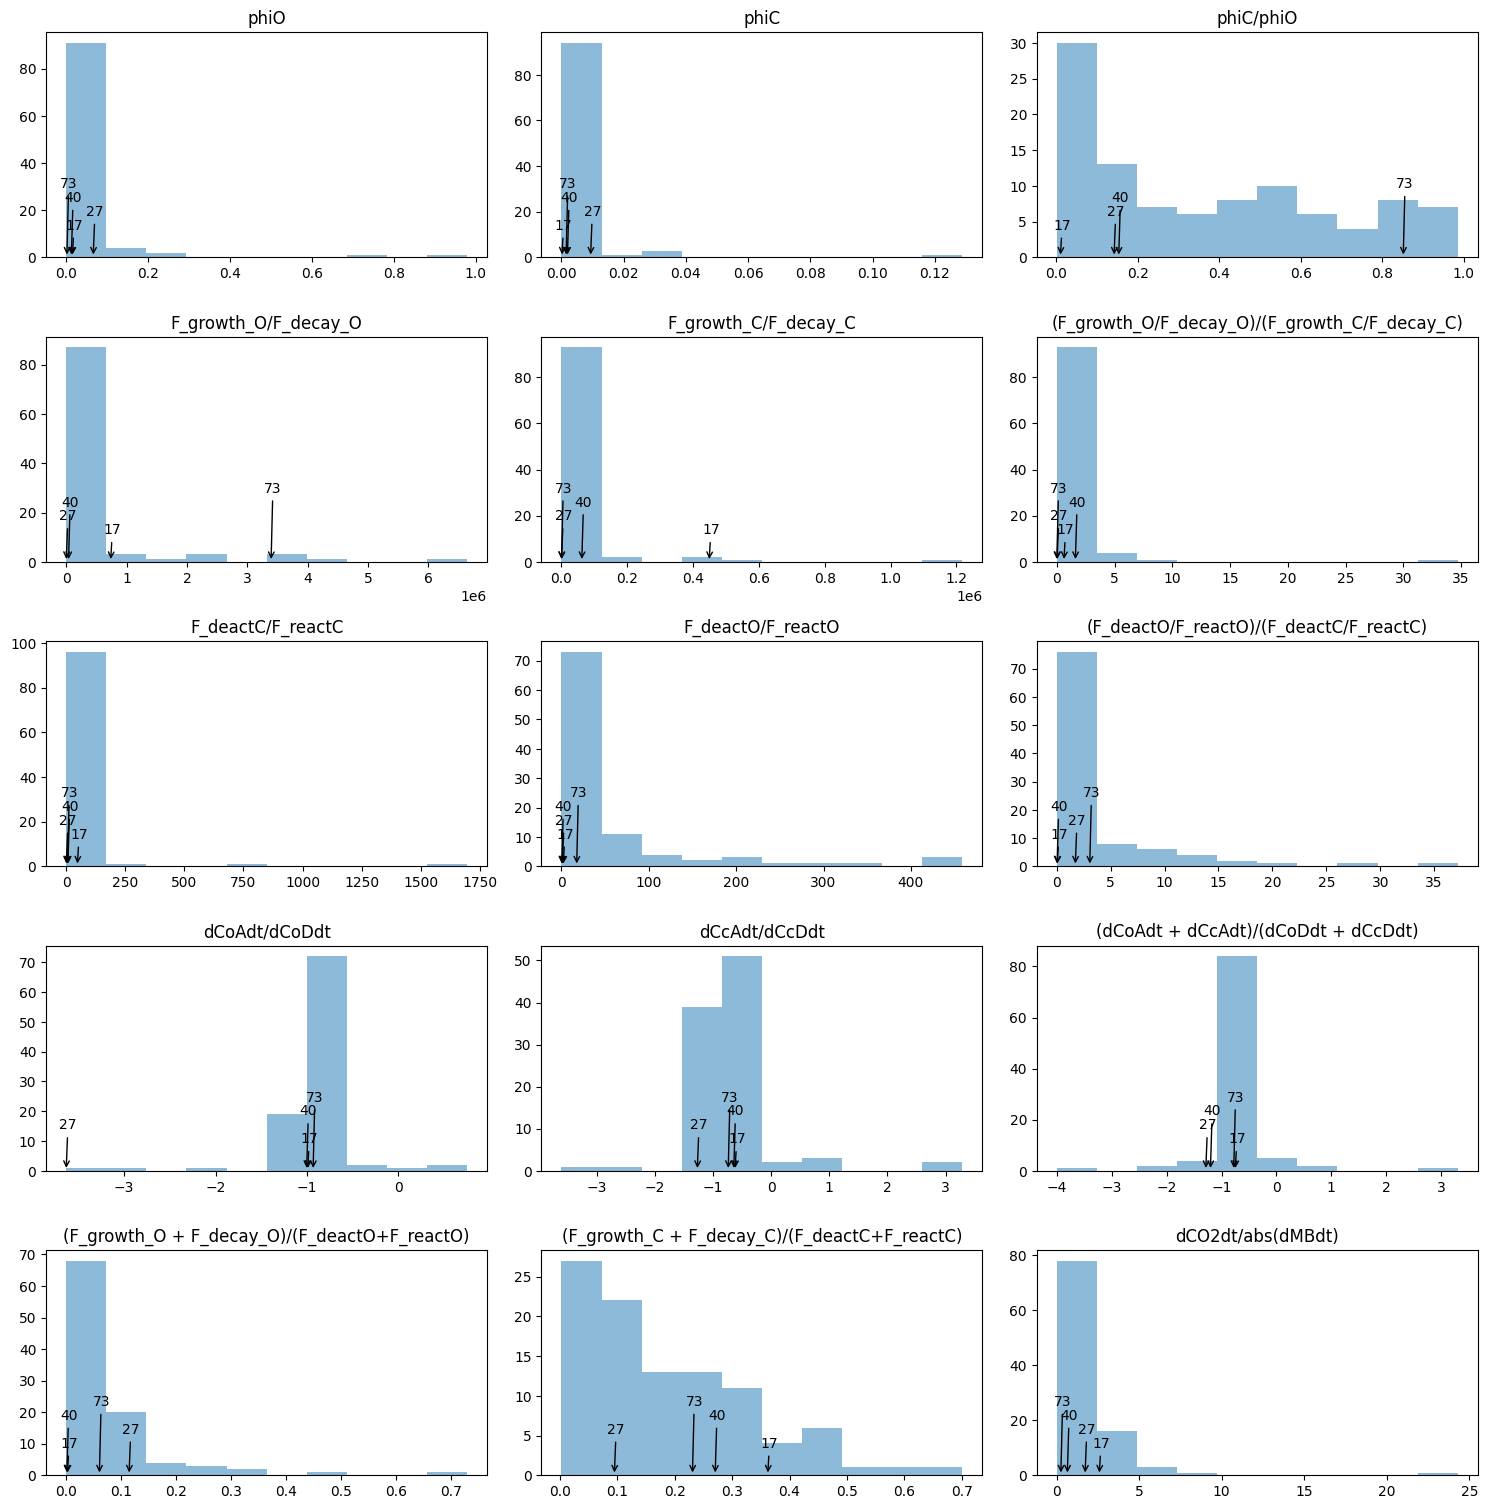

In [50]:

toEval = df

# Create subplots grid

# Calculate the number of rows and columns needed for subplots
num_rows = 6
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Flatten the axes array to iterate over them easily
axes = axes.flatten()

#outliers = selectedSets
# Plot histograms for each column
for i, column in enumerate(toEval.columns):
    ax = axes[i]  # Get the current axis
    ax.hist(toEval[column], alpha=0.5)
    ax.set_title(column)
    
    xtexts = [-10, 20, 50, 80]
    ytexts = [20, 30, 40, 50]
    # Add label for maximum value
    for idout, outliers in enumerate(selectedSets):
        # Find row index with maximum value for the current column
        max_row_index = outliers
        max_value = toEval[column][outliers]
        ax.annotate(max_row_index,
                     xy=(max_value, 0), xycoords='data',
                     xytext=(-5, ytexts[idout]), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

# Remove any empty subplots if the number of columns exceeds the number of data columns
for i in range(len(toEval.columns), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()